#### The aim of this project is to predict the energy use of lights and appliances in a low-energy building using the UCI data set collected in 2017. This dataset is provided to us by tutoring team of Computational Machine Learning, Master of AI at RMIT University. The description of the dataset was also found within the same resources provided to us.

In [37]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

### Retrieving the dataset

In [5]:
""" As per the scope of this of this project, the provided dataset is enough and we do not require any other
    to conduct and express our analysis of this problem. """

df = pd.read_csv('UCI_data.csv')

#### The description of the dataset as provided with the resources of the project.

date time year-month-day hour:minute:second <br>
T1 -  Temperature in kitchen area, in Celsius <br>
RH_1 -  Humidity in kitchen area, in % <br>
T2 - Temperature in living room area, in Celsius <br> 
RH_2 - Humidity in living room area, in % <br>
T3 -  Temperature in laundry room area <br>
RH_3 -  Humidity in laundry room area, in % <br>
T4 -  Temperature in office room, in Celsius <br>
RH_4 -  Humidity in office room, in % <br>
T5 - Temperature in bathroom, in Celsius <br>
RH_5 - Humidity in bathroom, in % <br>
T6 - Temperature outside the building (north side), in Celsius <br>
RH_6 - Humidity outside the building (north side), in % <br>
T7 - Temperature in ironing room , in Celsius <br>
RH_7 - Humidity in ironing room, in % <br>
T8 - Temperature in teenager room 2, in Celsius <br>
RH_8 - Humidity in teenager room 2, in % <br>
T9 - Temperature in parents room, in Celsius <br>
RH_9 - Humidity in parents room, in % <br>
To - Temperature outside (from Chievres weather station), in Celsius <br>
Pressure - (from Chievres weather station), in mm Hg <br>
RH_out - Humidity outside (from Chievres weather station), in % <br>
Wind speed - (from Chievres weather station), in m/s <br>
Visibility - (from Chievres weather station), in km <br>
Tdewpoint - (from Chievres weather station), Â°C <br>
rv1 - Random variable 1, nondimensional <br>
rv2 - Random variable 2, nondimensional <br>
<br>
------------------------------------------------------------------------------ <br>
TARGET_Energy - energy use of Appliances and light fixtures in the house in Wh

### Data Preparation

In [18]:
# Printing the name and the number of columns

print("Number of columns:- {} columns".format(len(df.columns)))
print("Column Names:- ",", ".join(list(df.columns)))

Number of columns:- 28 columns
Column Names:-  date, T1, RH_1, T2, RH_2, T3, RH_3, T4, RH_4, T5, RH_5, T6, RH_6, T7, RH_7, T8, RH_8, T9, RH_9, T_out, Press_mm_hg, RH_out, Windspeed, Visibility, Tdewpoint, rv1, rv2, TARGET_energy


In [26]:
""" As there are a lot of columns and we may require to print all of them, we will increase the limit
    of the number of columns that can be printed at one time """

pd.set_option("display.max_columns", None)

In [19]:
# Printing some rows to get a basic idea of the data

df.head()

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
0,2016-04-19 20:30:00,22.200000,39.500000,20.566667,37.656667,22.230000,37.030000,22.318571,36.610000,20.633333,...,33.90,9.70,766.100000,65.5,3.500000,40.000000,3.350000,24.061869,24.061869,60
1,2016-03-05 04:40:00,20.356667,37.126667,17.566667,40.230000,20.890000,37.663333,18.700000,36.260000,18.463333,...,41.09,0.30,740.333333,99.0,1.000000,41.333333,0.100000,4.622052,4.622052,50
2,2016-03-14 12:40:00,20.926667,38.790000,21.100000,35.526667,21.600000,36.290000,21.000000,34.826667,18.100000,...,38.76,4.40,768.466667,72.0,6.000000,22.666667,-0.266667,5.635898,5.635898,80
3,2016-01-22 15:30:00,18.290000,38.900000,17.290000,39.260000,18.390000,39.326667,16.100000,38.790000,16.100000,...,39.20,3.35,760.600000,82.0,5.500000,41.000000,0.500000,49.216445,49.216445,40
4,2016-02-10 00:40:00,22.290000,42.333333,21.600000,40.433333,22.666667,43.363333,19.100000,40.900000,19.290000,...,43.73,3.20,738.900000,88.0,7.333333,56.000000,1.400000,47.617579,47.617579,60


From the data printed above, we may say that the dataset represents a time-series with the column 'date' holding the date and time. Most of the columns seem to hold float values and the target columns represents values in the form of integers with no decimal values. However, the range of some columns appear to be different in accordance with the others and hence scaling may be required.

In [21]:
# Checking the size of the dataset.

df_len = len(df)
df_len

19735

Therefore, the dataset is of shape (19735,28).

In [22]:
# Extracting out some basic information from the dataset.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           19735 non-null  object 
 1   T1             19735 non-null  float64
 2   RH_1           19735 non-null  float64
 3   T2             19735 non-null  float64
 4   RH_2           19735 non-null  float64
 5   T3             19735 non-null  float64
 6   RH_3           19735 non-null  float64
 7   T4             19735 non-null  float64
 8   RH_4           19735 non-null  float64
 9   T5             19735 non-null  float64
 10  RH_5           19735 non-null  float64
 11  T6             19735 non-null  float64
 12  RH_6           19735 non-null  float64
 13  T7             19735 non-null  float64
 14  RH_7           19735 non-null  float64
 15  T8             19735 non-null  float64
 16  RH_8           19735 non-null  float64
 17  T9             19735 non-null  float64
 18  RH_9  

From the information above, we can confirm that all the columns except the date column and the target variable are of type 'float64'. The date column belongs to the object class specifically and it must be in the perfect format to be casted into the 'datetime' object. The target variable is an integer type. The non-null count of each column is equal to the number of rows present in the dataset which concludes that there are <b>no missing values</b>.

In [28]:
# Describing the dataset in statistical terms.

df.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033,101.496833
std,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634,104.380829
min,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322,10.000000
25%,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889,50.000000
50%,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653,60.000000
75%,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769,100.000000
max,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530,1110.000000


The description of the dataset reveals some important information about the data. The count of the columns confirms our findings from 'df.info()'. Min, max and the mean values of the columns together can help us to obtain some extra initial information. The 'RH_5' column has a mean of 50.95 and the minimum value of 29.81 but the highest value equal to 96.32. The 75% of this column is 53.67 which is still approximately half of the max value. This may increase the possibility of this column to contain <b>outliers</b>. A similar case can be seen with the column 'T6' where the maximum value is 28.29 which is approximately 4 times the value of its mean which is 7.91. The 75% is 11.26 which is less than half of the maximum value. The minimum value is also a non-positive number which indicates both the posibility of outliers and <b>negative values</b>. Further research needs to be done to check if negative values are allowed or not. The columns RH_6,T_out and TARGET_energy show similar behaviours. RH_out, Visibility and Tdewpoint have minimum values which are very less as compared to the mean and may also contain outliers. T_out also contains some negative values.

To recapitulate, there are no columns which have any missing values.The columns <b>RH_5, T6, TH_6, RH_6, RH_out, Visibility, Tdewpoint, T_out and TARGET_energy</b> may require some extra attention while doing the exploratory data analysis. We will confirm any possible chances of outliers. Some domain knowledge will also be looked upon to verify if the negative values present in the columns:T6 and T_out are valid or invalid.

### Data Visualization

In [34]:
# Some common variables for use in future.

column_list = list(df.columns)

In [68]:
"""We will explore each column one by one. The size of the dataset is too large and hence we need to 
downsample our data in order for the graphs to be executed. This will now be computationally feasible
and we will try to avoid degradation of the quality of the data as much as possible. We will use mean
of the values of the data points which will be merged."""

# A copy of the original dataset is created.
df2 = deepcopy(df)

# Each data point of the date column of the new dataset is converted into a datetime object.
df2['date'] = pd.to_datetime(df2['date'])

# The new dataframe is sorted.
df2.sort_values(by = ['date'], inplace = True, ascending=True, axis=0)

# Printing the new dataset
df2.head(4)

,date,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
18486,2016-01-11 17:00:00,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,90
7445,2016-01-11 17:10:00,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,90
14757,2016-01-11 17:20:00,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,80
11475,2016-01-11 17:30:00,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,90


A very important discovery is made when we print the newly created dataset. We discover that each reading is taken after a ten minute interval after the preceding reading. In other words, there is a <b>10 minute gap</b> between each reading.

In [74]:
# The data is resampled to represent readings at an interval of 30 minutes.
df2 = df2.resample('30T',on='date').mean()

df2.head(4)

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
date,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-11 17:00:00,19.890000,46.863333,19.200000,44.713056,19.79,44.817778,18.975556,45.816389,17.166667,55.163333,6.806667,83.825556,17.200000,41.540000,18.200000,48.831111,17.033333,45.530000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,20.174765,20.174765,86.666667
2016-01-11 17:30:00,19.890000,46.142222,19.200000,44.540000,19.79,44.977778,18.890000,45.661111,17.166667,55.070000,6.366667,84.694444,17.155556,41.260000,18.100000,48.590000,17.000000,45.363333,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,33.471323,33.471323,93.333333
2016-01-11 18:00:00,19.845556,45.641389,19.200000,44.477778,19.75,44.863333,18.890000,45.814444,17.122222,54.955556,6.192222,86.580000,17.133333,41.266667,18.100000,48.590000,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,37.243118,37.243118,106.666667
2016-01-11 18:30:00,19.950000,46.116667,19.337778,44.400000,19.79,44.863333,18.926667,46.318889,17.100000,55.000000,6.167778,87.828889,17.325833,42.826944,18.088889,48.604444,16.963333,45.290000,5.966667,734.366667,91.333333,5.666667,40.000000,4.633333,7.405293,7.405293,350.000000


In [78]:
# The characteristics of the new dataset are printed.

df2_len = len(df2)
df2.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,TARGET_energy
count,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000,6579.000000
mean,21.686958,40.260382,20.341718,40.420679,22.268073,39.242694,20.855724,39.027607,19.592472,50.949409,7.912268,54.603651,20.267535,35.389078,22.029381,42.936854,19.486205,41.552937,7.413163,755.522569,79.748113,4.039748,38.329685,3.761663,24.988959,24.988959,101.531134
std,1.606139,3.963740,2.192263,4.064487,2.005992,3.251432,2.042357,4.339961,1.843083,8.886670,6.088917,31.138877,2.110181,5.113308,1.956008,5.222240,2.014833,4.149346,5.317948,7.399243,14.885634,2.446582,11.664370,4.194497,8.358398,8.358398,93.047128
min,16.790000,27.228889,16.100000,20.730000,17.210000,28.973333,15.100000,28.073333,15.343333,29.901667,-6.006667,1.000000,15.406296,23.250000,16.345556,29.658333,14.890000,29.177778,-4.977778,729.333333,24.500000,0.166667,1.000000,-6.550000,1.730898,1.730898,20.000000
25%,20.750000,37.361111,18.812222,37.890556,20.790000,36.887778,19.533333,35.529444,18.268333,45.487778,3.628889,30.109167,18.708571,31.481857,20.790000,39.062778,18.022222,38.501667,3.666667,750.933333,70.333333,2.000000,29.166667,0.900000,19.080139,19.080139,50.000000
50%,21.600000,39.642222,19.985556,40.488889,22.100000,38.546071,20.655556,38.418889,19.390000,49.122037,7.286667,55.231111,20.044444,34.862222,22.122222,42.375370,19.390000,40.888889,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.930727,24.930727,63.333333
75%,22.622222,43.083333,21.510000,43.260000,23.312222,41.755000,22.100000,42.160000,20.633333,53.712778,11.233460,83.271481,21.609603,39.001667,23.390000,46.512083,20.600000,44.345000,10.416667,760.933333,91.666667,5.500000,40.000000,6.566667,30.958282,30.958282,110.000000
max,26.220000,59.408889,29.792222,54.583333,29.165333,50.061111,26.180000,50.930000,25.574444,95.887963,28.248000,99.900000,25.963333,51.301111,27.187778,58.750000,24.500000,53.272222,26.033333,772.283333,100.000000,13.500000,66.000000,15.400000,48.233431,48.233431,796.666667


IndexError: single positional indexer is out-of-bounds

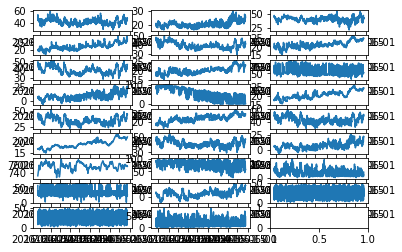

In [80]:
# Each column is explored separately.

for i in range(1, (df2_len-1)):
    ax = plt.subplot(9,3,i)
    ax.plot(df2.iloc[:,i-1])